# 디즈니플러스의 OTT 시장 진입 전략 수립
---

![img](http://file3.instiz.net/data/file3/2022/02/05/7/f/b/7fb6a8e81ca834a14cf137997add3fa3.jpg)
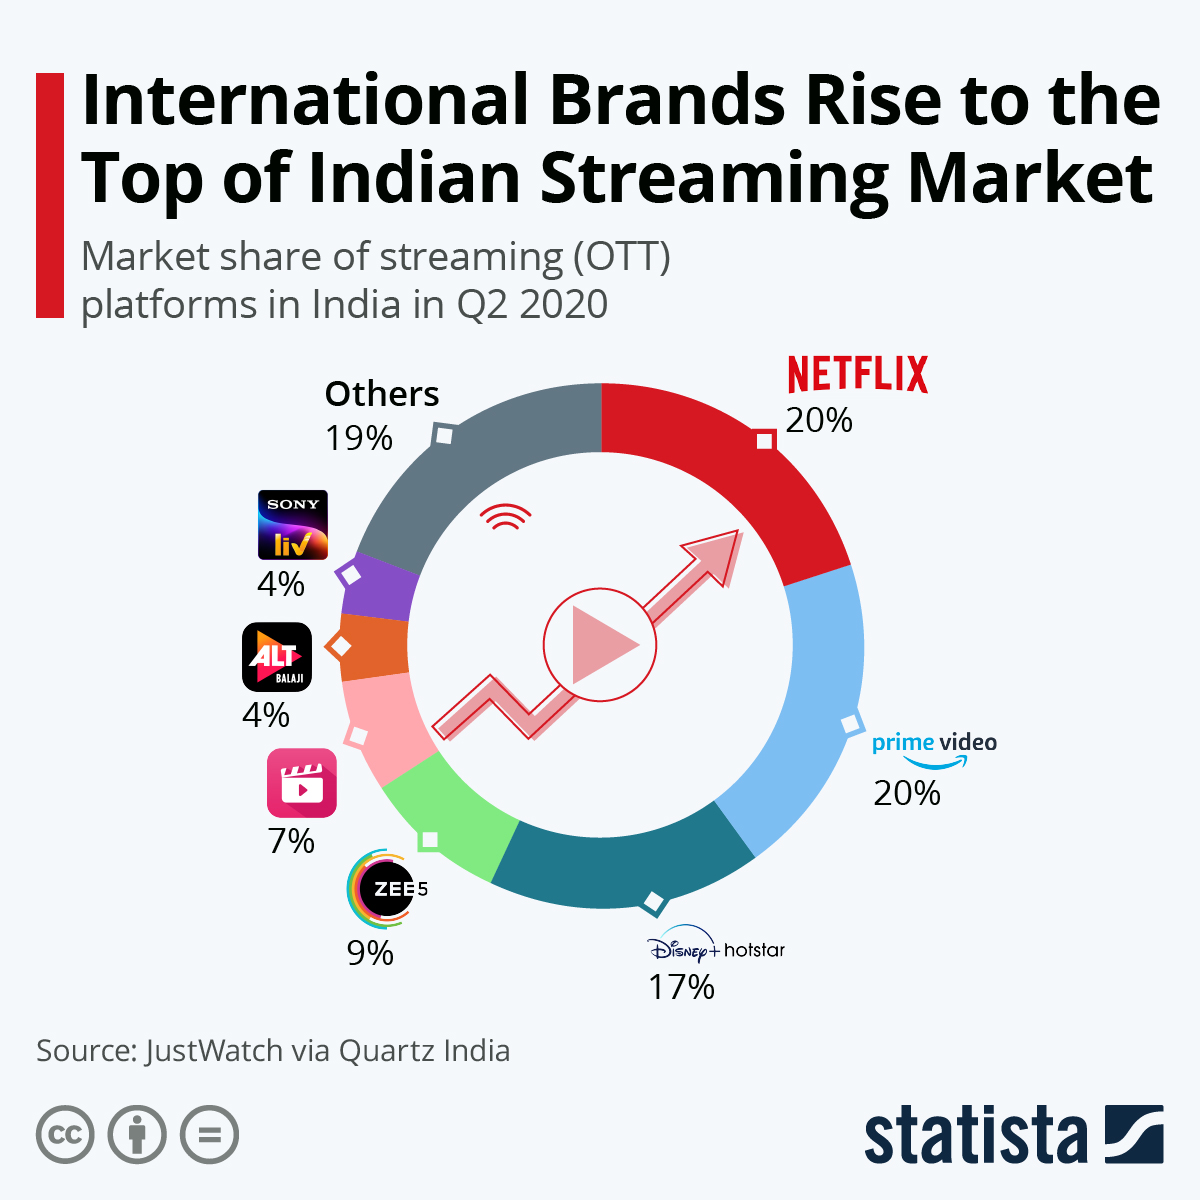

미국 OTT 시장의 점유율을 보면 Netflix, Amazon Prime, Hulu가 높은 순위를 차지하고 있습니다.  
2021년 OTT 시장에 뛰어든 디즈니 플러스는 다른 OTT 플랫폼에 비해 현저히 낮은 점유율인 것을 확인 할 수 있습니다.  

데이터톤 프로젝트를 진행하며 예측하고자 하는 것은 두 가지 입니다.  
- 넷플릭스가 주력하지 않는 장르를 찾아서 디즈니 플러스만의 장점과 결합  
- 2차적으로 장르, 출시된 날짜 미래 동향 예측  


## 1. 넷플릭스 연도별 장르별 시각화 분석

In [165]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
netflix_overall=pd.read_csv("netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [167]:
# data 처리

df = netflix_overall.drop(["rating","cast","duration","director","country","description", "release_year"], axis=1 )
df

,show_id,type,title,date_added,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,"September 24, 2021","Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019","Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019","Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,"November 1, 2019","Comedies, Horror Movies"
8805,s8806,Movie,Zoom,"January 11, 2020","Children & Family Movies, Comedies"


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   show_id     8807 non-null   object
 1   type        8807 non-null   object
 2   title       8807 non-null   object
 3   date_added  8797 non-null   object
 4   listed_in   8807 non-null   object
dtypes: object(5)
memory usage: 344.1+ KB


In [169]:
df.dropna(axis='index', how = 'any', subset = ['date_added'], inplace=True)
df

,show_id,type,title,date_added,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,"September 24, 2021","Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019","Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019","Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,"November 1, 2019","Comedies, Horror Movies"
8805,s8806,Movie,Zoom,"January 11, 2020","Children & Family Movies, Comedies"


In [170]:
# 연도만 추출하기
df["date_added"]= df["date_added"].apply(lambda x: x.split(", ")[1])
df

,show_id,type,title,date_added,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021,Documentaries
1,s2,TV Show,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,2021,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...
8802,s8803,Movie,Zodiac,2019,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,2019,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,2019,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,2020,"Children & Family Movies, Comedies"


In [171]:
# 숫자로 data type 변환
df["date_added"] = df["date_added"].astype(int)

In [172]:
# 확인
df.iloc[0]["date_added"]

2021

In [173]:
# 장르 뽑아내기
df["genre"] = df['listed_in'].apply(lambda x: x.split(", ")[0])

In [174]:
df.head()

,show_id,type,title,date_added,listed_in,genre
0,s1,Movie,Dick Johnson Is Dead,2021,Documentaries,Documentaries
1,s2,TV Show,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
2,s3,TV Show,Ganglands,2021,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,2021,"Docuseries, Reality TV",Docuseries
4,s5,TV Show,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows


In [175]:
df['genre'].nunique() # 36개 장르

36

In [176]:
df['genre'].value_counts() # 총 8797개 item 중 장르별 갯수

Dramas                          1600
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           773
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         386
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 252
Docuseries                       220
Anime Series                     175
International Movies             128
Reality TV                       120
TV Comedies                      119
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            57
TV Action & Adventure             39
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Anime Features                    21
Independent Movies                20
Classic & Cult TV                 20
Music & Musicals                  18
T

In [177]:
df.rename(columns = {"date_added":"year"}, inplace = True )
df

,show_id,type,title,year,listed_in,genre
0,s1,Movie,Dick Johnson Is Dead,2021,Documentaries,Documentaries
1,s2,TV Show,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
2,s3,TV Show,Ganglands,2021,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,2021,"Docuseries, Reality TV",Docuseries
4,s5,TV Show,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows
...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,2019,"Cult Movies, Dramas, Thrillers",Cult Movies
8803,s8804,TV Show,Zombie Dumb,2019,"Kids' TV, Korean TV Shows, TV Comedies",Kids' TV
8804,s8805,Movie,Zombieland,2019,"Comedies, Horror Movies",Comedies
8805,s8806,Movie,Zoom,2020,"Children & Family Movies, Comedies",Children & Family Movies


In [178]:
df_count = df.groupby('year')['genre'].count()
df_count

year
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: genre, dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   show_id    8797 non-null   object
 1   type       8797 non-null   object
 2   title      8797 non-null   object
 3   year       8797 non-null   int64 
 4   listed_in  8797 non-null   object
 5   genre      8797 non-null   object
dtypes: int64(1), object(5)
memory usage: 481.1+ KB


In [186]:
x = df["year"].iloc[0]
print(x)

2021


In [180]:
# x: year(연도별) y: genre 갯수 by colors
# plot with multiple lines

x = df["year"]
y = 


SyntaxError: invalid syntax (2987151845.py, line 4)

## 2. 넷플릭스 주력하지 않는 장르

시각화 결과 넷플릭스가 주력하여 생산하지 않는 장르는 ~~~

## 3. 디즈니 플러스 장르별 시각화 분석

## 4. 넷플릭스 주력하지 않는 장르와 디즈니플러스의 주력 장르와 비교

## 5. 장르 선택 후 시장성 예측 
### 5-1. 선택한 장르의 출시 작품수 추이를 확인
### 5.2 선택한 장르 작품 수 추세 확인

## 6. 디즈니플러스 OTT 시장 진입 전략 제안